In [47]:
# Modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [86]:
songs = pd.read_csv('training_data_scaled_slimmed_top_5.csv')
liked_songs = songs[songs['label']==1] 
disliked_songs = songs[songs['label']==0] 

In [87]:
songs_shuffled = songs.sample(frac=1)


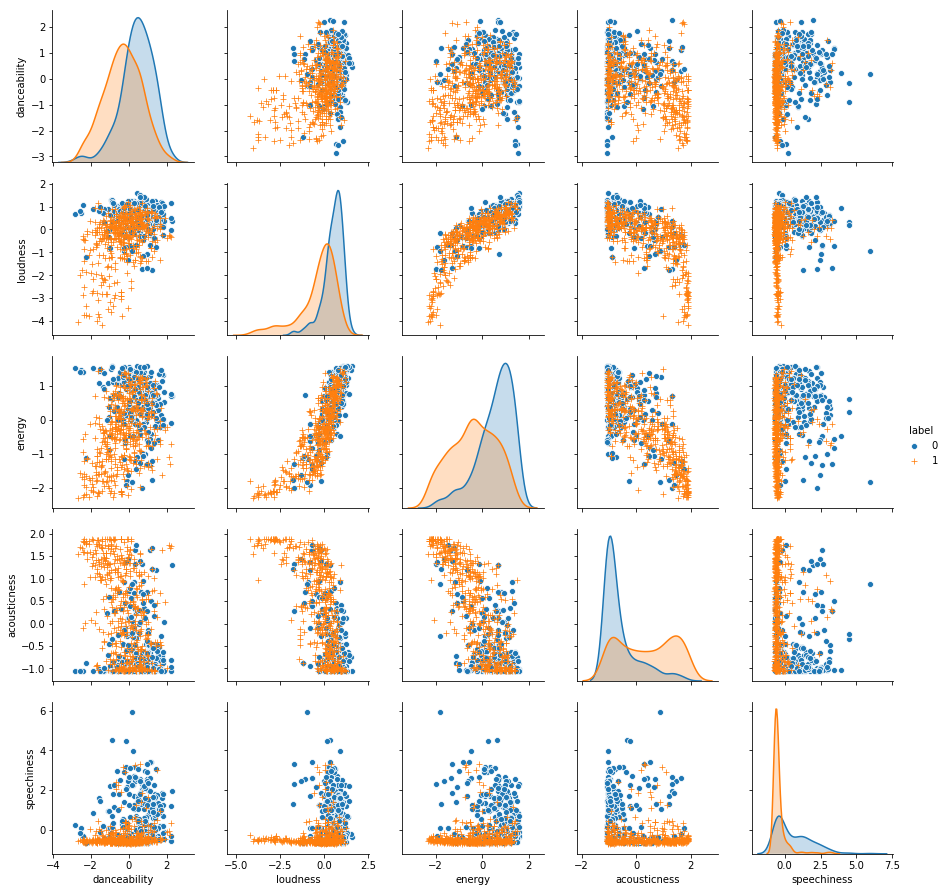

In [88]:
sns_pairplot = sns.pairplot(songs_shuffled, 
             hue= 'label',
            vars = ['danceability', 'loudness', 'energy', 'acousticness', 'speechiness'], 
             markers=["o", "+"]
            )



In [89]:
sns_pairplot.savefig('corr_plot_top_5.png')

In [66]:
my_pca = PCA(n_components=3);
my_pca.fit(songs_shuffled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
# my 2 principle components
my_pca.components_

array([[-0.354407  , -0.512603  , -0.52375271,  0.50992576, -0.22095028,
         0.16874131],
       [ 0.35400219, -0.22499262, -0.26840393,  0.15801545,  0.83902258,
        -0.15196159],
       [-0.85995537,  0.11511497,  0.17705439, -0.07916467,  0.45136888,
        -0.07665595]])

In [68]:
sum(my_pca.explained_variance_ratio_)

0.88734942677614925

In [76]:
liked_pca = my_pca.transform(liked_songs.values)
disliked_pca = my_pca.transform(disliked_songs.values)

array([[ 1.68369482, -0.14126596, -0.13248801],
       [-0.48432124, -0.52465851, -0.81922117],
       [ 0.47583724, -0.37958367, -0.60874781],
       ..., 
       [ 1.52194232, -0.05520045, -0.66577731],
       [-0.93986705, -0.74493368, -0.57311395],
       [-0.79467584, -1.32679868,  0.57677554]])

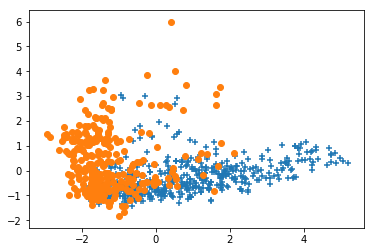

In [60]:
plt.scatter(liked_pca[:,0], liked_pca[:,1], marker='+')
plt.scatter(disliked_pca[:,0], disliked_pca[:,1])


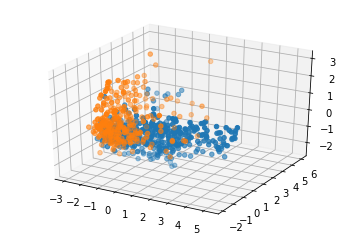

In [85]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(liked_pca[:,0], liked_pca[:,1], liked_pca[:,2])
ax.scatter(disliked_pca[:,0], disliked_pca[:,1], disliked_pca[:,2])
ax.